In [1]:
'''Trains a simple convnet on the CIFAR10 dataset for ONLY cats and dogs.
The focus of this is to understand image augmentation well enough to do custom work.

So don't worry as much about accuracy, worry more about adding augmentation to the existing method, 
understanding it, explaining it, and if it is significant enough, then trying to merge it into Keras.

TASK DETAILS:
Make a copy of:
from keras.preprocessing.image import ImageDataGenerator

Add functionality to ImageDataGenerator() beyond what is offered. You have flexibility here, one idea would be to add image 
histogram modification methods such as this: http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

You are welcome to do anything you want related to ImageDataGenerator to make it better, but histogram modification could be a great
starting point. With your work it helps to show before/after modifications in your notebook/blog. In the end this work is for
you, to help give you visibility, so focus more on something that can be shared on LinkedIn rather than just a notebook. 

13 seconds per epoch on a 2 GHz Intel Core i5.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64
num_classes = 2
epochs = 10

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()   

#Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

augmentation=True

if augmentation==True:
    datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0,
        height_shift_range=0,
        shear_range=0,
        zoom_range=0,
        horizontal_flip=True,
        fill_mode='nearest')
    
    datagen.fit(x_train)
    print("Running augmented training now")
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))
else:
    print("Running regular training, no augmentation")
    history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Using Theano backend.
ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.6 or higher required)
NoneType


x_train shape: (10000, 3, 32, 32)
10000 train samples
2000 test samples
Running augmented training now
Epoch 1/10
156/156 [==============================] - 4s - loss: 0.6973 - acc: 0.5139 - val_loss: 0.6918 - val_acc: 0.5260
Epoch 2/10
156/156 [==============================] - 4s - loss: 0.6889 - acc: 0.5376 - val_loss: 0.6875 - val_acc: 0.5615
Epoch 3/10
156/156 [==============================] - 4s - loss: 0.6827 - acc: 0.5566 - val_loss: 0.6708 - val_acc: 0.6025
Epoch 4/10
156/156 [==============================] - 4s - loss: 0.6707 - acc: 0.5819 - val_loss: 0.6558 - val_acc: 0.5960
Epoch 5/10
156/156 [==============================] - 4s - loss: 0.6674 - acc: 0.5973 - val_loss: 0.6491 - val_acc: 0.6325
Epoch 6/10
156/156 [==============================] - 4s - loss: 0.6570 - acc: 0.6124 - val_loss: 0.6373 - val_acc: 0.6320
Epoch 7/10
156/156 [==============================] - 4s - loss: 0.6516 - acc: 0.6239 - val_loss: 0.6321 - val_acc: 0.6490
Epoch 8/10
156/156 [================

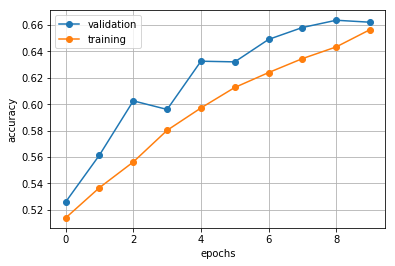

In [6]:
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(history.epoch,history.history['val_acc'],'-o',label='validation')
plt.plot(history.epoch,history.history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)